In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
ckd = pd.read_csv(r"C:\Users\reenanagrale\Desktop\BITS-Pilani\Courses\Semister 1\Data Mining\Assignments\1\ckd\ckd\kidneyChronic.csv")

In [11]:
ckd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [529]:
ckd.shape

(400, 30)

In [252]:
ckd['SNo'] = [i for i in range(len(ckd))]

In [253]:
ckd.isnull().sum()

age          0
bp           0
sg           0
al           0
su           0
rbc          0
pc           0
pcc          0
ba           0
bgr          0
bu           0
sc           0
sod          0
pot          0
hemo         0
pcv          0
wbcc         0
rbcc         0
htn          0
dm           0
cad          0
appet        0
pe           0
ane          0
class        0
age_group    0
sg_group     0
bp_group     0
SNo          0
dtype: int64

In [16]:
ckd.nunique()

age       77
bp        11
sg         6
al         7
su         7
rbc        3
pc         3
pcc        3
ba         3
bgr      147
bu       119
sc        85
sod       35
pot       41
hemo     116
pcv       45
wbcc      93
rbcc      47
htn        3
dm         6
cad        4
appet      3
pe         3
ane        3
class      2
dtype: int64

In [254]:
ckd_copy = ckd

In [17]:
#age convert to nominal and check for pattern

In [18]:
#check for correlation between features

In [20]:
#nominal dp = age, sg, al,su,rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane
#numerical = bp, bgr, bu, sc, sod, pot, hemo, pcv, wc

In [255]:
#check for null values (?) for each feature
for col in ckd.columns:
    nacount = len(ckd[ckd[col]=='?'])
    print("Number of null values for {} is {}".format(col,nacount))

Number of null values for age is 0
Number of null values for bp is 0
Number of null values for sg is 0
Number of null values for al is 46
Number of null values for su is 49
Number of null values for rbc is 152
Number of null values for pc is 65
Number of null values for pcc is 4
Number of null values for ba is 4
Number of null values for bgr is 44
Number of null values for bu is 19
Number of null values for sc is 17
Number of null values for sod is 87
Number of null values for pot is 88
Number of null values for hemo is 52
Number of null values for pcv is 70
Number of null values for wbcc is 105
Number of null values for rbcc is 130
Number of null values for htn is 2
Number of null values for dm is 2
Number of null values for cad is 2
Number of null values for appet is 1
Number of null values for pe is 1
Number of null values for ane is 1
Number of null values for class is 0
Number of null values for age_group is 0
Number of null values for sg_group is 0
Number of null values for bp_gr

C:\Users\reenanagrale\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# working on Age column

In [28]:
ckd['age'].unique()

array(['48', '7', '62', '51', '60', '68', '24', '52', '53', '50', '63',
       '40', '47', '61', '21', '42', '75', '69', '?', '73', '70', '65',
       '76', '72', '82', '46', '45', '35', '54', '11', '59', '67', '15',
       '55', '44', '26', '64', '56', '5', '74', '38', '58', '71', '34',
       '17', '12', '43', '41', '57', '8', '39', '66', '81', '14', '27',
       '83', '30', '4', '3', '6', '32', '80', '49', '90', '78', '19', '2',
       '33', '36', '37', '23', '25', '20', '29', '28', '22', '79'],
      dtype=object)

In [62]:
age_group=ckd.groupby('class')['age'].count().reset_index().sort_values(by='class',ascending=False)

In [80]:
age_list = [int(x) for x in ckd['age'] if x!='?']

In [83]:
np.mean(age_list)

51.48337595907928

In [256]:
#replace age with ? value with mean i.e 51
ckd_copy['age'].replace('?','51',inplace=True)

In [257]:
#checking if any ? in age field
ckd_copy[ckd_copy['age']=='?']

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,dm,cad,appet,pe,ane,class,age_group,sg_group,bp_group,SNo


In [258]:
#convert str to int for age, so we convert to age_group
ckd_copy['age'] = [int(i) for i in ckd_copy['age']]

In [89]:
#convert age into age group by binning

In [259]:
#create age group
#Children :1 - 12
#teen :13 - 19
#young:20 - 35
#middle age - 36 - 50
#old - 50 and above
age_bins = [1,12,19,35,50,100]
labels_bin = ['Children','Teen','Young','Middle_age','Old']
ckd_copy['age_group'] = pd.cut(ckd_copy.age,age_bins,labels=labels_bin,include_lowest=True)

In [260]:
ckd_copy['age_group'].unique()

[Middle_age, Children, Old, Young, Teen]
Categories (5, object): [Children < Teen < Young < Middle_age < Old]

In [272]:
age_class_grp = ckd_copy.groupby(['class','age_group']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

In [270]:
age_class_grp.set_index('age_group',inplace=True)

In [271]:
age_class_grp

,class,Count
age_group,,
Old,ckd,169
Old,notckd,61
Middle_age,ckd,49
Middle_age,notckd,46
Young,notckd,39
Young,ckd,15
Children,ckd,12
Teen,ckd,5
Teen,notckd,3


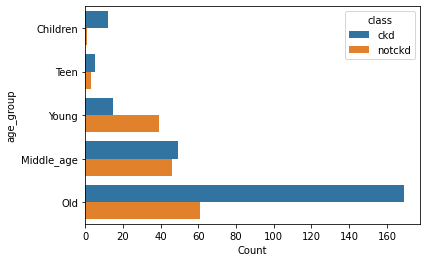

In [273]:
sns.barplot(y=age_class_grp['age_group'],x=age_class_grp['Count'],hue=age_class_grp['class'])

It is observed that major Chronic Kidney desease is observed for OLD Age people ie 50 and years above. 

Middle age people have 50% changes of impacting with Chronic Kidney Desease. We focus to understand what causes more impact of Middle age and Old age people with Kidney deseases.


# Working on sg column

In [180]:
#unique values of urine specific gravity for the given dataset

#sg is nominal data feature, 
'''well hydrated < 1.010
    Minimal dehydrated 1.010 - 1.020
    significant dehydrated 1.021 - 1.030
    Seriuos dehydration > 1.030
'''
ckd_copy['sg'].unique()

array(['1.02', '1.01', '1.005', '1.015', '0', '1.025'], dtype=object)

In [207]:
# handling null ie ''?'' in the data
# total 47 records have null sg field, we give new category as no data
ckd_copy['sg'].replace('?',0.0,inplace=True)
ckd_copy['sg_group'] = [float(i) for i in ckd_copy['sg']]
sg_bins = [-1,0,1.010,1.020,1.030,1.031]
#ckd_copy['sg_group'] = [float(i) for i in ckd_copy['sg']]
sg_labels = ['No_data','Well_hydrated','Minimal_dehydrated','significant_dehydrated','Seriuos_dehydration']
ckd_copy['sg_group'] = pd.cut(ckd_copy.sg_group,sg_bins,labels=sg_labels,include_lowest=True)

In [208]:
ckd_copy['sg_group'].unique()

[Minimal_dehydrated, Well_hydrated, No_data, significant_dehydrated]
Categories (4, object): [No_data < Well_hydrated < Minimal_dehydrated < significant_dehydrated]

In [210]:
#Understand the distribution of specific gravity with class
sg_class_grp = ckd_copy.groupby(['class','sg_group']).count()['sg'].reset_index().sort_values(by='sg',ascending=False).rename({'sg':'Count'},axis=1)

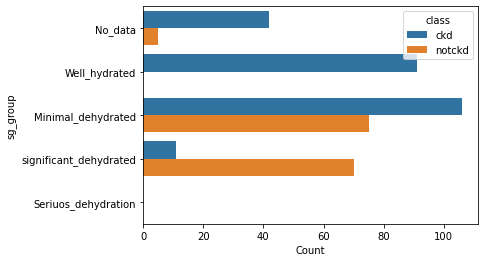

In [211]:
sns.barplot(y=sg_class_grp['sg_group'],x=sg_class_grp['Count'],hue=sg_class_grp['class'])

Observations:
Based on the given dataset, its not convincing that dehydration is the cause of Chronic Kidney desease. We observe that Well hydrated people have also suffered with Chronic Kidney desease. And significantly dehydrated person are not diagonised with CKD.

# Working on bp column

In [274]:
ckd_copy['bp'].unique()

array(['80', '50', '70', '90', '0', '100', '60', '110', '140', '180',
       '120'], dtype=object)

In [275]:
ckd_copy['bp'].replace('?',"0",inplace=True)

ckd_copy['bp_group'] = [float(i) for i in ckd_copy['bp']]
#Considering diastolic info in the dataset
#Normal <80

#HBP_1 = 80 - 89
#HBP_2 = 90 - 120
#HBP_3 = 120 and above
bp_bins = [0,50,79,89,119,200]
bp_labels = ['No_Data','Normal','HBP_1','HBP_2','HBP_3']
ckd_copy['bp_group'] = pd.cut(ckd_copy.bp_group,bp_bins,labels=bp_labels,include_lowest=True)

In [276]:
ckd_copy['bp_group'].unique()

[HBP_1, No_Data, Normal, HBP_2, HBP_3]
Categories (5, object): [No_Data < Normal < HBP_1 < HBP_2 < HBP_3]

In [277]:
bp_class_grp = ckd_copy.groupby(['class','bp_group']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

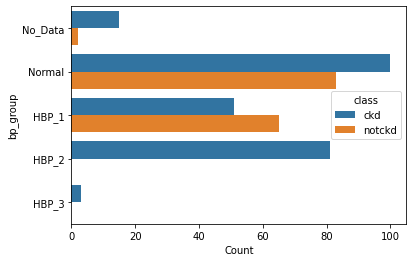

In [278]:
sns.barplot(y=bp_class_grp['bp_group'],x=bp_class_grp['Count'],hue=bp_class_grp['class'])

Observations: 

It is observed that person having BP level from 90 and above surely suffer from CKD. 

Whereas, 45% of people with Normal BP have changes of suffering with CKD. We need to find what other factors of health condition trigger CKD in people with Normal BP.   

In [279]:
bp_class_grp

,class,bp_group,Count
1,ckd,Normal,100.0
6,notckd,Normal,83.0
3,ckd,HBP_2,81.0
7,notckd,HBP_1,65.0
2,ckd,HBP_1,51.0
0,ckd,No_Data,15.0
4,ckd,HBP_3,3.0
5,notckd,No_Data,2.0
8,notckd,HBP_2,NaN
9,notckd,HBP_3,NaN


# Working on al column

Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. 
A healthy kidney doesn’t let albumin pass into the urine. A damaged kidney lets some albumin pass into the urine.
 0 - Normal, 1-Mild, 2-High,3-Very High, 4-Servere 5-Extreme

In [280]:
ckd_copy['al'].replace('?',"No_Data",inplace=True)

In [281]:
al_class_grp = ckd_copy.groupby(['class','al']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

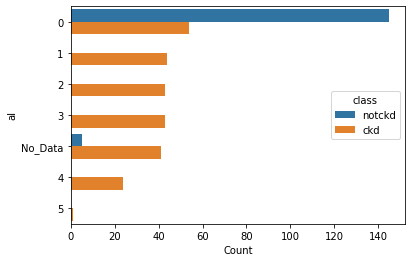

In [287]:
sns.barplot(y=al_class_grp['al'],x=al_class_grp['Count'],hue=al_class_grp['class'])

# Working on su column - sugar level

In [283]:
ckd_copy['su'].replace('?',"No_Data",inplace=True)

In [284]:
su_class_grp = ckd_copy.groupby(['class','su']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

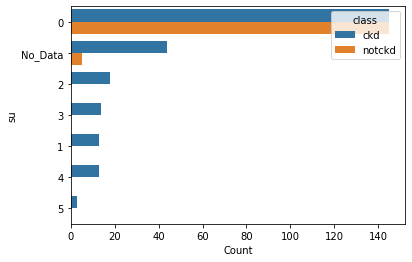

In [288]:
sns.barplot(y=su_class_grp['su'],x=su_class_grp['Count'],hue=su_class_grp['class'])

Observation:
    
    Its observed that people reporting CKD have positive Sugar level and it suggests poeple with Moderate to high sugar level have tendency to be affected with CKD.
    We see an equal distribution for people (with CKD and without CKD) with no sugar level.

# Working with rbc column 

In [289]:
ckd_copy['rbc'].unique()

array(['?', 'normal', 'abnormal'], dtype=object)

In [290]:
ckd_copy['rbc'].replace('?','No_data', inplace=True)

In [291]:
rbc_class_grp = ckd_copy.groupby(['class','rbc']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

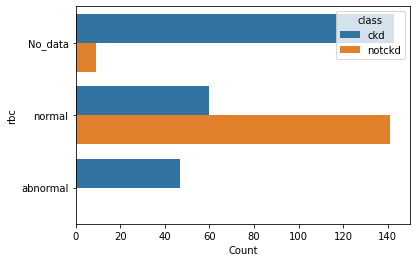

In [295]:
sns.barplot(y=rbc_class_grp['rbc'],x=rbc_class_grp['Count'],hue=rbc_class_grp['class'])

Observations:

    We have 152 records where the RBC values are not given, out of these 142 records show impacted with CKD. We need to analyse No_Data records to understand the appropriate values of these records.
    
    Its observed that 30% of people with normal RBC value have also reported positive for CKD and with all people reprtoing Abnormal RBC range have diagnosed with RBC. 

# Working with rbcc column

In [297]:
# RBC column can be obtained from RBCC values, so lets understand RBCC column

In [327]:
ckd_copy['rbcc'].unique()

array([ 5.2, -1. ,  3.9,  4.6,  4.4,  5. ,  4. ,  3.7,  3.8,  3.4,  2.6,
        2.8,  4.3,  3.2,  3.6,  4.1,  4.9,  2.5,  4.2,  4.5,  3.1,  4.7,
        3.5,  6. ,  2.1,  5.6,  2.3,  2.9,  2.7,  8. ,  3.3,  3. ,  2.4,
        4.8,  5.4,  6.1,  6.2,  6.3,  5.1,  5.8,  5.5,  5.3,  6.4,  5.7,
        5.9,  6.5])

In [299]:
#Normal - 4 to 6.1
#We can replace null values with mean of RBCC

In [304]:
ckd_copy['rbcc'].replace('?',"0",inplace=True)
ckd_copy['rbcc'].replace('\t?',"0",inplace=True)

ckd_copy['rbcc'] = [float(i) for i in ckd_copy['rbcc']]

In [329]:
ckd_copy['rbcc'].mean() 

3.165749999999999

In [335]:
ckd_copy['rbcc'].replace(0,ckd_copy['rbcc'].mean(),inplace=True) 

In [504]:
#Forming new rbc_class based on rbcc values.
#If rbcc value between 4 - 6.1 then RBC is Normal, else abnormal

ckd_copy['rbc_class'] = 'Null'
ckd_copy['rbc_class'] = np.where(((ckd_copy['rbcc']>=4)&(ckd_copy['rbcc']<=6.1)),'normal','abnormal')
        

In [505]:
ckd_copy['rbc_class'].unique()

array(['normal', 'abnormal'], dtype=object)

In [506]:
rbc_class_grp = ckd_copy.groupby(['class','rbc_class']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

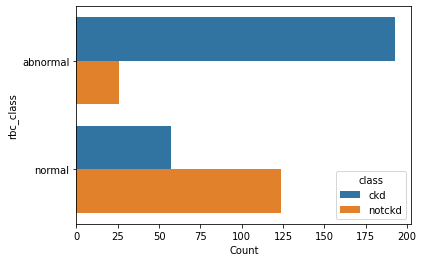

In [507]:
sns.barplot(y=rbc_class_grp['rbc_class'],x=rbc_class_grp['Count'],hue=rbc_class_grp['class'])

Observations:
    
    We get the view that people with rbcc count in the range 4 to 6.1 have reported less with ckd. Its also observed that people reported with CKD have rbcc count out of the mentioned Normal range. 

# Working with pc, pcc and ba column
Pyuria is the condition of urine containing white blood cells or pus.

In [515]:
ckd_copy.groupby('pc')['SNo'].count()

pc
?            65
abnormal     76
normal      259
Name: SNo, dtype: int64

In [518]:
ckd_copy.groupby('pcc')['SNo'].count()

pcc
?               4
notpresent    354
present        42
Name: SNo, dtype: int64

In [519]:
ckd_copy.groupby('ba')['SNo'].count()

ba
?               4
notpresent    374
present        22
Name: SNo, dtype: int64

In [520]:
# As no reference of pus cells range, pcc and ba is not provided. Replacing Null values with No_data
ckd_copy['pc'].replace('?',"No_data",inplace=True)
ckd_copy['pcc'].replace('?',"No_data",inplace=True)
ckd_copy['ba'].replace('?',"No_data",inplace=True)

# Working on wbc column

In [521]:
ckd_copy['wbcc'].unique()

array(['7800', '6000', '7500', '6700', '7300', '?', '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [526]:
ckd_copy['wbcc']=ckd_copy['wbcc'].str.replace('\t','')
ckd_copy['wbcc'].replace('?',0, inplace=True)

In [533]:
#wbcc column have 106 records with no wbcc values, so fill this with mean
ckd_copy['wbcc']=ckd_copy['wbcc'].astype('int')
ckd_copy['wbcc'].replace(0,ckd_copy['wbcc'].mean(), inplace=True)

In [551]:
#Normal range for wbc count is 5400 to 11000 so creating new categorical column for wbc
ckd_copy['wbc_class'] = np.where(((ckd_copy['wbcc']>=5400)&(ckd_copy['wbcc']<=11000)),'normal','abnormal')

In [558]:
wbc_class_grp = ckd_copy.groupby(['class','wbc_class']).count()['SNo'].reset_index().sort_values(by='SNo',ascending=False).rename({'SNo':'Count'},axis=1)

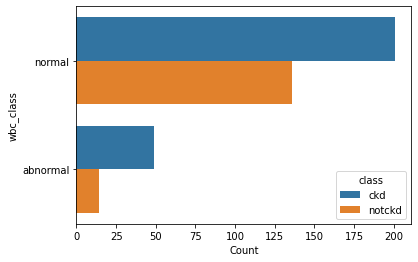

In [559]:
sns.barplot(y=wbc_class_grp['wbc_class'],x=wbc_class_grp['Count'],hue=wbc_class_grp['class'])

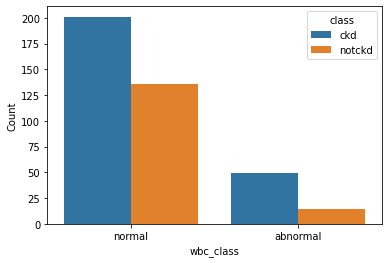

In [594]:
sns.barplot(data=wbc_class_grp, x='wbc_class', y="Count", hue='class')


Observations:
    WBC count individually does not evidently give any references for ckd. 

# Working on bgr - blood glucose random column

In [560]:
ckd_copy['bgr'].unique()

array(['121', '?', '423', '117', '106', '74', '100', '410', '138', '70',
       '490', '380', '208', '98', '157', '76', '99', '114', '263', '173',
       '95', '108', '156', '264', '123', '93', '107', '159', '140', '171',
       '270', '92', '137', '204', '79', '207', '124', '144', '91', '162',
       '246', '253', '141', '182', '86', '150', '146', '425', '112',
       '250', '360', '163', '129', '133', '102', '158', '165', '132',
       '104', '127', '415', '169', '251', '109', '280', '210', '219',
       '295', '94', '172', '101', '298', '153', '88', '226', '143', '115',
       '89', '297', '233', '294', '323', '125', '90', '308', '118', '224',
       '128', '122', '214', '213', '268', '256', '84', '105', '288',
       '139', '78', '273', '242', '424', '303', '148', '160', '192',
       '307', '220', '447', '309', '22', '111', '261', '215', '234',
       '131', '352', '80', '239', '110', '130', '184', '252', '113',
       '230', '341', '255', '103', '238', '248', '120', '241', '269',

In [563]:
ckd_copy['bgr'].replace('?','0',inplace=True)
ckd_copy['bgr']=ckd_copy['bgr'].astype(int)

In [564]:
ckd_copy['bgr'].replace(0,ckd_copy['bgr'].mean(),inplace=True)

In [584]:
fig = px.violin(ckd_copy, y='bgr', x="class", color="class", box=True, template = 'plotly_dark')
fig.show()

Number of null values for hemo is 52
Number of null values for pcv is 70

# Working on bu column

In [568]:
ckd_copy['bu'].unique()

array(['36', '18', '53', '56', '26', '25', '54', '31', '60', '107', '55',
       '72', '86', '90', '162', '46', '87', '27', '148', '180', '163',
       '?', '50', '75', '45', '28', '155', '33', '39', '153', '29', '65',
       '103', '70', '80', '20', '202', '77', '89', '24', '17', '32',
       '114', '66', '38', '164', '142', '96', '391', '15', '111', '73',
       '19', '92', '35', '16', '139', '48', '85', '98', '186', '37', '47',
       '52', '82', '51', '106', '22', '217', '88', '118', '50.1', '71',
       '34', '40', '21', '219', '30', '125', '166', '49', '208', '176',
       '68', '145', '165', '322', '23', '235', '132', '76', '42', '44',
       '41', '113', '1.5', '146', '58', '133', '137', '67', '115', '223',
       '98.6', '158', '94', '74', '150', '61', '57', '95', '191', '93',
       '241', '64', '79', '215', '309', '10'], dtype=object)

In [581]:
ckd_copy['bu'].replace('?',0,inplace=True)
ckd_copy['bu'] = ckd_copy['bu'].astype(float)
ckd_copy['bu'].replace(0,ckd_copy['bu'].mean(),inplace=True)

In [582]:
ckd_copy['bu'].describe()

count    400.000000
mean      57.296155
std       49.289311
min        1.500000
25%       27.000000
50%       44.000000
75%       61.750000
max      391.000000
Name: bu, dtype: float64

In [596]:
?px.violin

In [598]:
import plotly.express as px
fig = px.violin(ckd_copy, y='bu', x="class", color="class", box=True, template = None)
fig.show()

# Working on sc - serum creatinine 

In [605]:
ckd_copy['sc'].describe()

count     400
unique     85
top       1.2
freq       40
Name: sc, dtype: object

In [599]:
ckd_copy['sc'].unique()

array(['1.2', '0.8', '1.8', '3.8', '1.4', '1.1', '24', '1.9', '7.2', '4',
       '2.7', '2.1', '4.6', '4.1', '9.6', '2.2', '5.2', '1.3', '1.6',
       '3.9', '76', '7.7', '?', '2.4', '7.3', '1.5', '2.5', '2', '3.4',
       '0.7', '1', '10.8', '6.3', '5.9', '0.9', '3', '3.25', '9.7', '6.4',
       '3.2', '32', '0.6', '6.1', '3.3', '6.7', '8.5', '2.8', '15', '2.9',
       '1.7', '3.6', '5.6', '6.5', '4.4', '10.2', '11.5', '0.5', '12.2',
       '5.3', '9.2', '13.8', '16.9', '6', '7.1', '18', '2.3', '13',
       '48.1', '14.2', '16.4', '2.6', '7.5', '4.3', '18.1', '11.8', '9.3',
       '6.8', '13.5', '12.8', '11.9', '12', '13.4', '15.2', '13.3', '0.4'],
      dtype=object)

#Normal range for sc is 0.59 to 1.35 mg/dl 
#We observe that some values are above 10 and max is 76. 
#These seems to be outliers and incorrect values or captured in mm/L so we perform convert of these values

In [604]:
import plotly.express as px
fig = px.violin(ckd_copy, y='sc', x="class", color="class", box=True, template = None)
fig.show()

In [646]:
import copy

In [647]:
ckd_copy['sc'] = copy.deepcopy(ckd['sc'])

In [649]:
ckd_copy['sc'].replace('',0, inplace=True)

In [651]:
ckd_copy['sc']=ckd_copy['sc'].astype(float)

In [653]:
#Normalization for sc column
#Two digit values are converted from mm/L to mg/dL*0.0113

ckd_copy['sc']=[round(i*0.0113,1) if i > 10 else i for i in ckd_copy['sc']]

In [654]:
fig = px.violin(ckd_copy, y='sc', x="class", color="class", box=True, template = None)
fig.show()

# Working on sod - sodium column 

In [655]:
ckd_copy['sod'].unique()

array(['?', '111', '142', '104', '114', '131', '138', '135', '130', '141',
       '139', '4.5', '136', '129', '140', '132', '133', '134', '125',
       '163', '137', '128', '143', '127', '146', '126', '122', '147',
       '124', '115', '145', '113', '120', '150', '144'], dtype=object)

In [656]:
fig = px.violin(ckd_copy, y='sod', x="class", color="class", box=True, template = None)
fig.show()

 We clearly observe outlier in sod for ckd class. Applying outlier removal - Capping techniques

In [664]:
lower_limit = ckd_copy[ckd_copy['sod']!='?']['sod'].astype(float).quantile(0.01)
upper_limit = ckd_copy[ckd_copy['sod']!='?']['sod'].astype(float).quantile(0.99)

In [666]:
mean_value = ckd_copy[ckd_copy['sod']!='?']['sod'].astype(float).mean()

In [667]:
ckd_copy['sod'].replace('?',mean_value,inplace=True)

In [668]:
ckd_copy['sod'] = ckd_copy['sod'].astype(float)


In [671]:
ckd_copy['sod_new'] = np.where(ckd_copy['sod'] >= upper_limit,
        upper_limit,
        np.where(ckd_copy['sod'] <= lower_limit,
        lower_limit,
        ckd_copy['sod']))

In [672]:
fig = px.violin(ckd_copy, y='sod_new', x="class", color="class", box=True, template = None)
fig.show()

# Working on pot - potassium column 

In [674]:
ckd_copy['pot'].unique()

array(['?', '2.5', '3.2', '4', '3.7', '4.2', '5.8', '3.4', '6.4', '4.9',
       '4.1', '4.3', '5.2', '3.8', '4.6', '3.9', '4.7', '5.9', '4.8',
       '4.4', '6.6', '39', '5.5', '5', '3.5', '3.6', '7.6', '2.9', '4.5',
       '5.7', '5.4', '5.3', '47', '6.3', '5.1', '5.6', '3', '2.8', '2.7',
       '6.5', '3.3'], dtype=object)

In [675]:
mean_value = ckd_copy[ckd_copy['pot']!='?']['pot'].astype(float).mean()

In [676]:
ckd_copy['pot'].replace('?',mean_value, inplace=True)

In [679]:
#I identified that some of the values are in double digit and assuming its errorious, correcting it to single digit.
ckd_copy['pot']=np.where((ckd_copy['pot'].astype(float)>10),round(ckd_copy['pot'].astype(float)/10,1),ckd_copy['pot'])


In [680]:
fig = px.violin(ckd_copy, y='pot', x="class", color="class", box=True, template = None)
fig.show()

# Working on hem - hemoglobin and ane - Anemia column

In [682]:
ckd_copy['hemo'].unique()

array(['15.4', '11.3', '9.6', '11.2', '11.6', '12.2', '12.4', '10.8',
       '9.5', '9.4', '9.7', '9.8', '5.6', '7.6', '12.6', '12.1', '12.7',
       '10.3', '7.7', '10.9', '?', '11.1', '9.9', '12.5', '12.9', '10.1',
       '12', '13', '7.9', '9.3', '15', '10', '8.6', '13.6', '10.2',
       '10.5', '6.6', '11', '7.5', '15.6', '15.2', '4.8', '9.1', '8.1',
       '11.9', '13.5', '8.3', '7.1', '16.1', '10.4', '9.2', '6.2', '13.9',
       '14.1', '6', '11.8', '11.7', '11.4', '14', '8.2', '13.2', '6.1',
       '8', '12.3', '8.4', '14.3', '9', '8.7', '10.6', '13.1', '10.7',
       '5.5', '5.8', '6.8', '8.8', '8.5', '13.8', '11.5', '7.3', '13.7',
       '12.8', '13.4', '6.3', '3.1', '17', '15.9', '14.5', '15.5', '16.2',
       '14.4', '14.2', '16.3', '14.8', '16.5', '15.7', '13.3', '14.6',
       '16.4', '16.9', '16', '14.7', '16.6', '14.9', '16.7', '16.8',
       '15.8', '15.1', '17.1', '17.2', '15.3', '17.3', '17.4', '17.7',
       '17.8', '17.5', '17.6'], dtype=object)

In [683]:
ckd_copy['ane'].unique()

array(['no', 'yes', '?'], dtype=object)